<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
longest = movies.sort_values(by='duration', ascending= True)['title'][-1::]
shortest = movies.sort_values(by='duration', ascending= False)['title'][-1::]

print('longest is '+ str(longest.values[0]))
print('shortest is '+ str(shortest.values[0]))

longest is Hamlet
shortest is Freaks


#### Create a histogram of duration, choosing an "appropriate" number of bins.

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


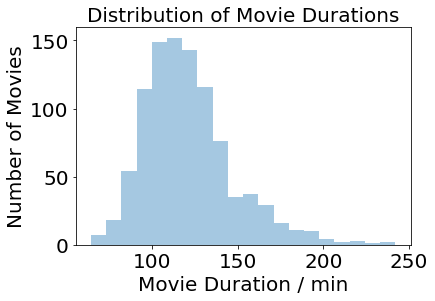

In [7]:
# Answer:
fig, ax = plt.subplots()

fontsize = 20

ax = sns.distplot(movies.duration, kde = 0, bins = 20)

ax.set_title('Distribution of Movie Durations', fontsize = fontsize)
ax.set_xlabel('Movie Duration / min', fontsize = fontsize)
ax.set_ylabel('Number of Movies', fontsize = fontsize)
ax.tick_params(labelsize = fontsize)

#### Use a box plot to display that same data.

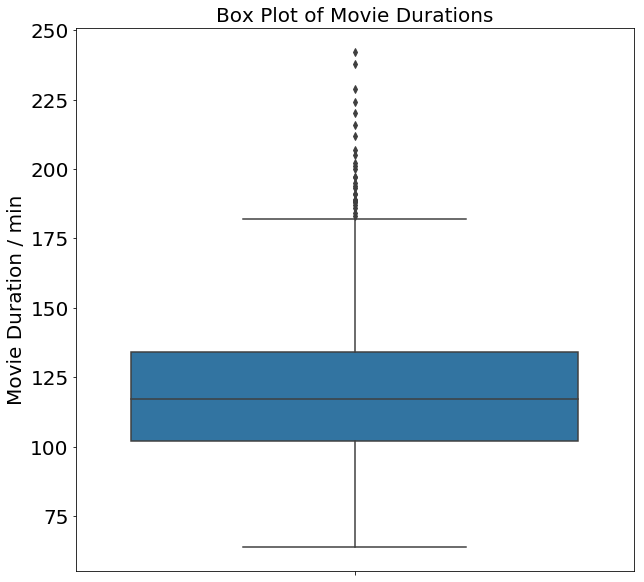

In [8]:
# Answer:
fig, ax = plt.subplots(figsize = (10,10))

fontsize = 20

ax.set_title('Box Plot of Movie Durations', fontsize = fontsize)
ax = sns.boxplot(movies.duration,orient='v')
ax.set_ylabel('Movie Duration / min', fontsize = fontsize)
ax.tick_params(labelsize = fontsize)

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

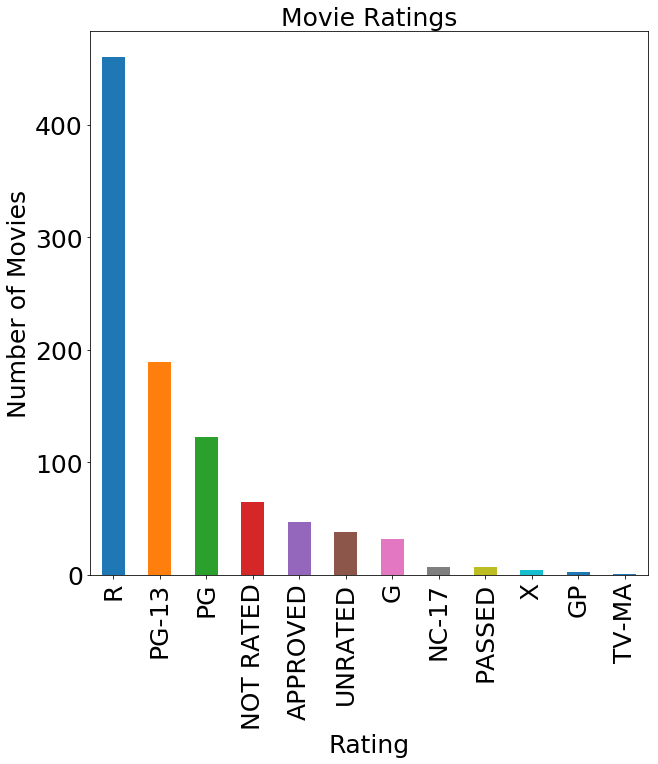

In [10]:
# Answer:
fig, ax = plt.subplots(figsize = (10,10))

movies_rating = movies['content_rating'].value_counts()
ax = movies_rating.plot(kind = 'bar')

fontsize = 25

ax.set_title('Movie Ratings', fontsize = fontsize)
ax.set_ylabel('Number of Movies', fontsize = fontsize)
ax.set_xlabel('Rating', fontsize = fontsize)
ax.tick_params(labelsize = fontsize)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies['content_rating'][movies['content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])] = 'UNRATED'

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies['content_rating'][movies['content_rating'].isin(['X', 'TV-MA'])] = 'NC-17'

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
movies['title'][movies[movies.content_rating.isnull()].index]

# There are only three, so I googled them and filled in their actual ratings: (True Grit is the 1969 version, not the 2010
# based on the duration listed in the dataset)
#     Butch Cassidy and the Sundance Kid    PG
#     Where Eagles Dare                     PG
#     True Grit (1969)                      G

# if this is not what you intended me to do then another, less accurate method would to assume they
# are rated R as are the largets portion of the movies on this list

187    Butch Cassidy and the Sundance Kid
649                     Where Eagles Dare
936                             True Grit
Name: title, dtype: object

In [15]:
movies['content_rating'][187] = 'PG'
movies['content_rating'][649] = 'PG'
movies['content_rating'][936] = 'G'

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can 

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
long_movies = movies[movies['duration']>=120]
short_movies = movies[movies['duration']<120]

print(long_movies['star_rating'].mean())
print(short_movies['star_rating'].mean())

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

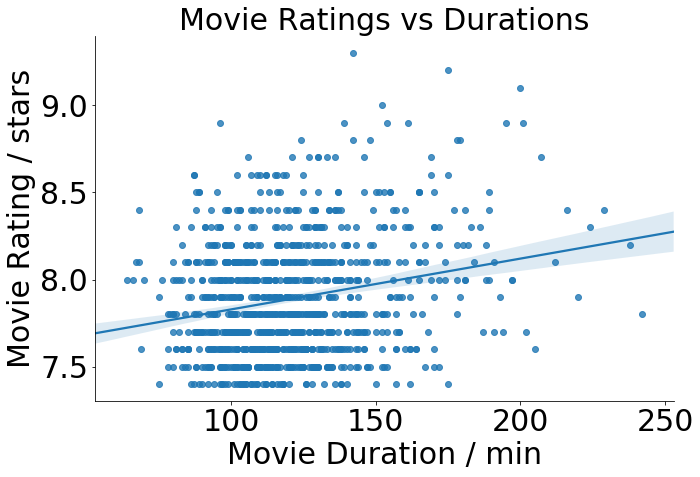

In [17]:
# Answer:
#There is not much of a correlation.

fontsize = 30

g = sns.lmplot(x='duration',y='star_rating', data = movies)
g.fig.set_size_inches(10,6)
g.ax.set_title('Movie Ratings vs Durations', fontsize = fontsize)
g.ax.set_ylabel('Movie Rating / stars', fontsize = fontsize)
g.ax.set_xlabel('Movie Duration / min', fontsize = fontsize)
g.ax.tick_params(labelsize = fontsize)

#### Calculate the average duration for each genre.

In [18]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

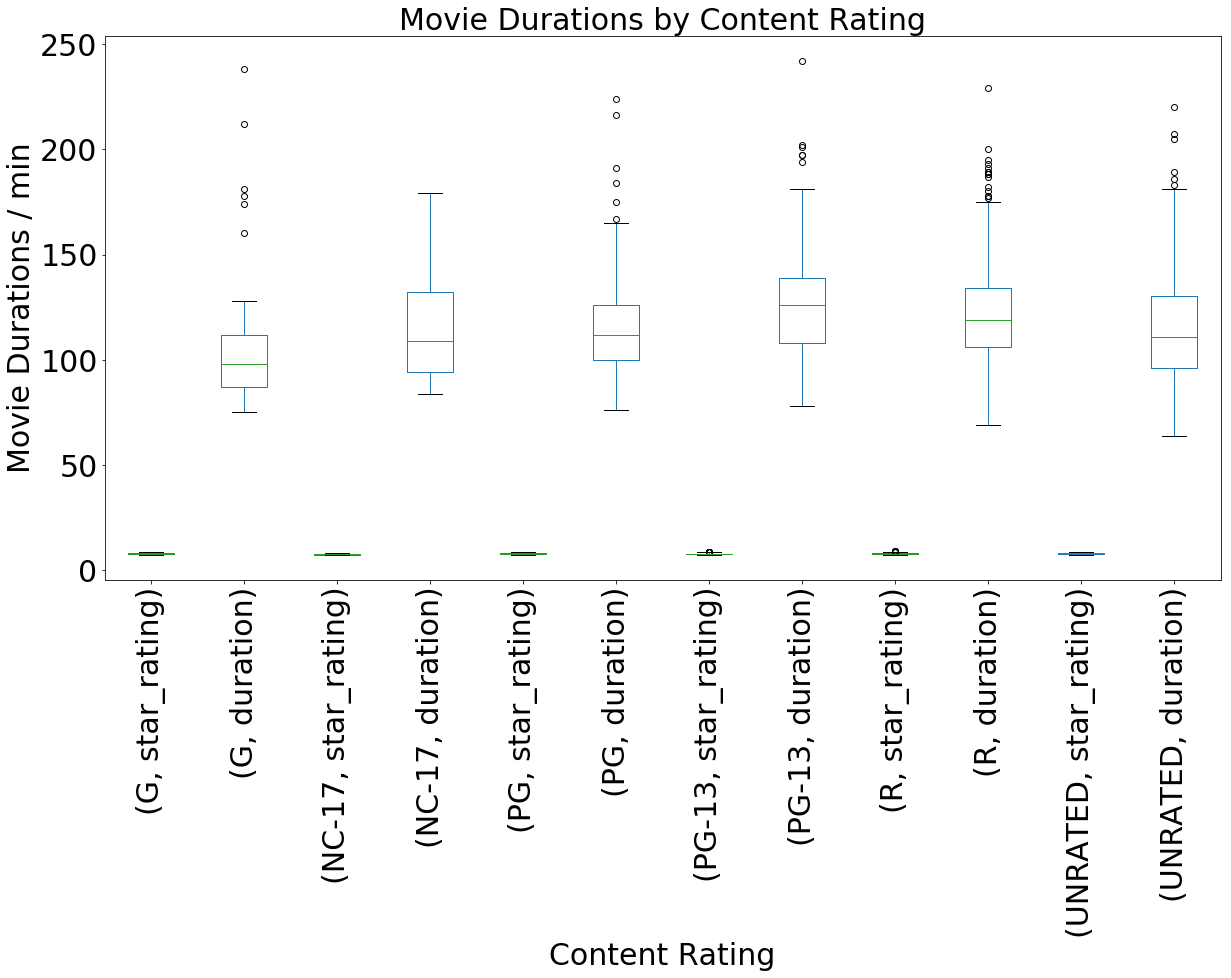

In [19]:
# Answer:

movies_gb_genre = movies.groupby('content_rating')

fig, ax = plt.subplots(figsize = (20,10))
ax=movies_gb_genre.boxplot('duration', grid=False,rot='vertical', ax = ax)

ax.set_title('Movie Durations by Content Rating', fontsize = fontsize)
ax.set_ylabel('Movie Durations / min', fontsize = fontsize)
ax.set_xlabel('Content Rating', fontsize = fontsize)
ax.tick_params(labelsize = fontsize)

#### Determine the top rated movie (by star rating) for each genre.

In [20]:
# Answer:
list(zip(movies['genre'][movies.groupby('genre')['star_rating'].idxmax()],movies['title'][movies.groupby('genre')['star_rating'].idxmax()],movies.groupby('genre')['star_rating'].max()))

[('Action', 'The Dark Knight', 9.0),
 ('Adventure', 'The Lord of the Rings: The Return of the King', 8.9),
 ('Animation', 'Spirited Away', 8.6),
 ('Biography', "Schindler's List", 8.9),
 ('Comedy', 'Life Is Beautiful', 8.6),
 ('Crime', 'The Shawshank Redemption', 9.3),
 ('Drama', '12 Angry Men', 8.9),
 ('Family', 'E.T. the Extra-Terrestrial', 7.9),
 ('Fantasy', 'The City of Lost Children', 7.7),
 ('Film-Noir', 'The Third Man', 8.3),
 ('History', 'Battleship Potemkin', 8.0),
 ('Horror', 'Psycho', 8.6),
 ('Mystery', 'Rear Window', 8.6),
 ('Sci-Fi', 'Blade Runner', 8.2),
 ('Thriller', 'Shadow of a Doubt', 8.0),
 ('Western', 'The Good, the Bad and the Ugly', 8.9)]

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [21]:
# Answer:
dupes = movies['title'].value_counts()[movies['title'].value_counts()>1]
dupes

True Grit                          2
Les Miserables                     2
Dracula                            2
The Girl with the Dragon Tattoo    2
Name: title, dtype: int64

In [22]:
for dupe in dupes.index:
    if list(movies[movies['title']==dupe].reset_index().iloc[0,:]) == list(movies[movies['title']==dupe].reset_index().iloc[1,:]):
        print(str(dupe)+' has a duplicate')
    else:
        print(str(dupe)+' does not have a duplicate')

True Grit does not have a duplicate
Les Miserables does not have a duplicate
Dracula does not have a duplicate
The Girl with the Dragon Tattoo does not have a duplicate


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:
movies['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [24]:
genres_over_10 = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure','Animation', 'Horror', 'Mystery']

In [25]:
movies_ds = movies[movies['genre'].isin(genres_over_10)]
movies_ds.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [26]:
# Answer:
genres_over_10 = movies['genre'].value_counts().index[movies['genre'].value_counts()>10]
movies_ds = movies[movies['genre'].isin(genres_over_10)]
movies_ds.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [27]:
# Answer:
gb_genre = movies.groupby('genre')['star_rating'].mean()
msk = movies['genre'].value_counts()>10
gb_genre[msk]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [28]:
df = movies.groupby('genre')['star_rating'].agg({'mean','count'})
df=df[df['count']>10]
df

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

### Problem: Find the actor appearing in the most movie genres

In [29]:
actors_lists = []
actors_lists_list = []
for actors in movies['actors_list']:
    actors_list = []
    for actor in actors.split("u'"):
        actors_list.append(actor.replace('[','').replace(',','').replace(']','').replace("' ",'').replace("'",''))
        actors_lists_list.append(actor.replace('[','').replace(',','').replace(']','').replace("' ",'').replace("'",''))
    try:
        actors_list.remove('')
        actors_lists.append(actors_list)
    except ValueError:
        actors_lists.append(actors_list)
actors_lists = pd.Series(actors_lists)
actors_lists_list = pd.Series(actors_lists_list).drop_duplicates()
appearances = []
genres = []
for actor in actors_lists_list:
    count = 0
    genre_count = 0
    genre_list=[] #list of genres this actor has been in
    for actors_list,genre in zip(actors_lists,movies['genre']):
        if actor in actors_list:
            count=count+1
            if genre not in (genre_list):
                genre_list.append(genre)
                genre_count = genre_count+1
    genres.append(genre_count)
    appearances.append(count)

df_appearances = pd.DataFrame({'actor':actors_lists_list,'num_appearances':appearances,'num_genres':genres})

print(df_appearances['actor'][df_appearances['num_genres'].idxmax()]
      +' has been in '
      +str(df_appearances['num_genres'].max())
      +' genres, the most of all the actors listed.')

Brad Pitt has been in 8 genres, the most of all the actors listed.
